In [1]:
%matplotlib ipympl

import relative_imports
from spatiotemporal.SEN12MSCRTS import DatasetManager
from spatiotemporal.torch_datasets.minimal_dataset import S2Dataset
from tqdm.notebook import tqdm
import matplotlib as mpl
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
from os.path import join
from torch.utils.data import DataLoader
import xarray as xr
xr.set_options(display_expand_data=False)

In [2]:
root_dir='/LOCAL2/shvl/datasets/cloud_removal/SEN12MSCRTS'
cloud_maps_dir="/LOCAL2/shvl/datasets/cloud_removal/SEN12MSCRTS_cloud_maps"
cloud_histograms_csv = join(cloud_maps_dir, "cloud_histograms.csv")

In [3]:
dataset_manager = DatasetManager(
    root_dir=root_dir,
    cloud_maps_dir=cloud_maps_dir,
    cloud_probability_threshold=0.6
)

# dataset_manager.load_dataset()
# dataset_manager.save_to_file()
dataset_manager.load_from_file()

In [4]:
dataset_manager.data

S1  \
ROI      tile patch timestep                                                      
ROIs1158 106  0     0         /LOCAL2/shvl/datasets/cloud_removal/SEN12MSCRT...   
                    1         /LOCAL2/shvl/datasets/cloud_removal/SEN12MSCRT...   
                    2         /LOCAL2/shvl/datasets/cloud_removal/SEN12MSCRT...   
                    3         /LOCAL2/shvl/datasets/cloud_removal/SEN12MSCRT...   
                    4         /LOCAL2/shvl/datasets/cloud_removal/SEN12MSCRT...   
...                                                                         ...   
ROIs2017 146  299   25        /LOCAL2/shvl/datasets/cloud_removal/SEN12MSCRT...   
                    26        /LOCAL2/shvl/datasets/cloud_removal/SEN12MSCRT...   
                    27        /LOCAL2/shvl/datasets/cloud_removal/SEN12MSCRT...   
                    28        /LOCAL2/shvl/datasets/cloud_removal/SEN12MSCRT...   
                    29        /LOCAL2/shvl/datasets/cloud_removal/SEN12MSCRT...   

                                                                             S2  \
ROI      tile patch timestep                                                      
ROIs1158 106  0     0         /LOCAL2/shvl/datasets/cloud_removal/SEN12MSCRT...   
                    1         /LOCAL2/shvl/datasets/cloud_removal/SEN12MSCRT...   
                    2         /LOCAL2/shvl/datasets/cloud_removal/SEN12MSCRT...   
                    3         /LOCAL2/shvl/datasets/cloud_removal/SEN12MSCRT...   
                    4         /LOCAL2/shvl/datasets/cloud_removal/SEN12MSCRT...   
...                                                                         ...   
ROIs2017 146  299   25        /LOCAL2/shvl/datasets/cloud_removal/SEN12MSCRT...   
                    26        /LOCAL2/shvl/datasets/cloud_removal/SEN12MSCRT...   
                    27        /LOCAL2/shvl/datasets/cloud_removal/SEN12MSCRT...   
                    28        /LOCAL2/shvl/datasets/cloud_removal/SEN12MSCRT...   
                    29        /LOCAL2/shvl/datasets/cloud_removal/SEN12MSCRT...   

                                                                     S2CLOUDMAP  
ROI      tile patch timestep                                                     
ROIs1158 106  0     0         /LOCAL2/shvl/datasets/cloud_removal/SEN12MSCRT...  
                    1         /LOCAL2/shvl/datasets/cloud_removal/SEN12MSCRT...  
                    2         /LOCAL2/shvl/datasets/cloud_removal/SEN12MSCRT...  
                    3         /LOCAL2/shvl/datasets/cloud_removal/SEN12MSCRT...  
                    4         /LOCAL2/shvl/datasets/cloud_removal/SEN12MSCRT...  
...                                                                         ...  
ROIs2017 146  299   25        /LOCAL2/shvl/datasets/cloud_removal/SEN12MSCRT...  
                    26        /LOCAL2/shvl/datasets/cloud_removal/SEN12MSCRT...  
                    27        /LOCAL2/shvl/datasets/cloud_removal/SEN12MSCRT...  
                    28        /LOCAL2/shvl/datasets/cloud_removal/SEN12MSCRT...  
                    29        /LOCAL2/shvl/datasets/cloud_removal/SEN12MSCRT...  

[458790 rows x 3 columns]

In [5]:
band_names = dataset_manager.config["bands"]["S2"]
band_names

['B01',
 'B02',
 'B03',
 'B04',
 'B05',
 'B06',
 'B07',
 'B08',
 'B8A',
 'B09',
 'B10',
 'B11',
 'B12']

# Example batch

In [11]:
dataset = S2Dataset(dataset_manager=dataset_manager)
len(dataset)

458790

In [12]:
data_loader = DataLoader(
    dataset,
    batch_size=64,
    shuffle=False,
    # num_workers=32,
    collate_fn=dataset.collate_fn,
    # prefetch_factor=2
)
len(data_loader), len(data_loader)*64

(7169, 458816)

In [13]:
iterator = iter(data_loader)
batch = next(iterator)

In [14]:
image = batch["S2_image"]
image.shape, image.dtype

((64, 13, 256, 256), dtype('uint16'))

In [15]:
dataset_manager.data.loc[batch["index"]]

S1  \
ROI      tile patch timestep                                                      
ROIs1158 106  0     0         /LOCAL2/shvl/datasets/cloud_removal/SEN12MSCRT...   
                    1         /LOCAL2/shvl/datasets/cloud_removal/SEN12MSCRT...   
                    2         /LOCAL2/shvl/datasets/cloud_removal/SEN12MSCRT...   
                    3         /LOCAL2/shvl/datasets/cloud_removal/SEN12MSCRT...   
                    4         /LOCAL2/shvl/datasets/cloud_removal/SEN12MSCRT...   
...                                                                         ...   
              1     29        /LOCAL2/shvl/datasets/cloud_removal/SEN12MSCRT...   
              2     0         /LOCAL2/shvl/datasets/cloud_removal/SEN12MSCRT...   
                    1         /LOCAL2/shvl/datasets/cloud_removal/SEN12MSCRT...   
                    2         /LOCAL2/shvl/datasets/cloud_removal/SEN12MSCRT...   
                    3         /LOCAL2/shvl/datasets/cloud_removal/SEN12MSCRT...   

                                                                             S2  \
ROI      tile patch timestep                                                      
ROIs1158 106  0     0         /LOCAL2/shvl/datasets/cloud_removal/SEN12MSCRT...   
                    1         /LOCAL2/shvl/datasets/cloud_removal/SEN12MSCRT...   
                    2         /LOCAL2/shvl/datasets/cloud_removal/SEN12MSCRT...   
                    3         /LOCAL2/shvl/datasets/cloud_removal/SEN12MSCRT...   
                    4         /LOCAL2/shvl/datasets/cloud_removal/SEN12MSCRT...   
...                                                                         ...   
              1     29        /LOCAL2/shvl/datasets/cloud_removal/SEN12MSCRT...   
              2     0         /LOCAL2/shvl/datasets/cloud_removal/SEN12MSCRT...   
                    1         /LOCAL2/shvl/datasets/cloud_removal/SEN12MSCRT...   
                    2         /LOCAL2/shvl/datasets/cloud_removal/SEN12MSCRT...   
                    3         /LOCAL2/shvl/datasets/cloud_removal/SEN12MSCRT...   

                                                                     S2CLOUDMAP  
ROI      tile patch timestep                                                     
ROIs1158 106  0     0         /LOCAL2/shvl/datasets/cloud_removal/SEN12MSCRT...  
                    1         /LOCAL2/shvl/datasets/cloud_removal/SEN12MSCRT...  
                    2         /LOCAL2/shvl/datasets/cloud_removal/SEN12MSCRT...  
                    3         /LOCAL2/shvl/datasets/cloud_removal/SEN12MSCRT...  
                    4         /LOCAL2/shvl/datasets/cloud_removal/SEN12MSCRT...  
...                                                                         ...  
              1     29        /LOCAL2/shvl/datasets/cloud_removal/SEN12MSCRT...  
              2     0         /LOCAL2/shvl/datasets/cloud_removal/SEN12MSCRT...  
                    1         /LOCAL2/shvl/datasets/cloud_removal/SEN12MSCRT...  
                    2         /LOCAL2/shvl/datasets/cloud_removal/SEN12MSCRT...  
                    3         /LOCAL2/shvl/datasets/cloud_removal/SEN12MSCRT...  

[64 rows x 3 columns]

# Process whole dataset

### Create DataFrame to store zero pixels

In [16]:
zero_pixels_df_batch = pd.DataFrame(
    data=pd.NA,
    columns=band_names,
    index=dataset_manager.data.index,
    dtype=pd.Int64Dtype()
)

zero_pixels_df_batch

B01   B02   B03   B04   B05   B06   B07   B08  \
ROI      tile patch timestep                                                   
ROIs1158 106  0     0         <NA>  <NA>  <NA>  <NA>  <NA>  <NA>  <NA>  <NA>   
                    1         <NA>  <NA>  <NA>  <NA>  <NA>  <NA>  <NA>  <NA>   
                    2         <NA>  <NA>  <NA>  <NA>  <NA>  <NA>  <NA>  <NA>   
                    3         <NA>  <NA>  <NA>  <NA>  <NA>  <NA>  <NA>  <NA>   
                    4         <NA>  <NA>  <NA>  <NA>  <NA>  <NA>  <NA>  <NA>   
...                            ...   ...   ...   ...   ...   ...   ...   ...   
ROIs2017 146  299   25        <NA>  <NA>  <NA>  <NA>  <NA>  <NA>  <NA>  <NA>   
                    26        <NA>  <NA>  <NA>  <NA>  <NA>  <NA>  <NA>  <NA>   
                    27        <NA>  <NA>  <NA>  <NA>  <NA>  <NA>  <NA>  <NA>   
                    28        <NA>  <NA>  <NA>  <NA>  <NA>  <NA>  <NA>  <NA>   
                    29        <NA>  <NA>  <NA>  <NA>  <NA>  <NA>  <NA>  <NA>   

                               B8A   B09   B10   B11   B12  
ROI      tile patch timestep                                
ROIs1158 106  0     0         <NA>  <NA>  <NA>  <NA>  <NA>  
                    1         <NA>  <NA>  <NA>  <NA>  <NA>  
                    2         <NA>  <NA>  <NA>  <NA>  <NA>  
                    3         <NA>  <NA>  <NA>  <NA>  <NA>  
                    4         <NA>  <NA>  <NA>  <NA>  <NA>  
...                            ...   ...   ...   ...   ...  
ROIs2017 146  299   25        <NA>  <NA>  <NA>  <NA>  <NA>  
                    26        <NA>  <NA>  <NA>  <NA>  <NA>  
                    27        <NA>  <NA>  <NA>  <NA>  <NA>  
                    28        <NA>  <NA>  <NA>  <NA>  <NA>  
                    29        <NA>  <NA>  <NA>  <NA>  <NA>  

[458790 rows x 13 columns]

In [17]:
zero_pixels_df_batch.loc[batch["index"]] = (batch["S2_image"] == 0).sum(axis=(-2, -1))
zero_pixels_df_batch.dropna()

B01  B02  B03  B04  B05  B06  B07  B08  B8A  \
ROI      tile patch timestep                                                
ROIs1158 106  0     0           0    0    0    0    0    0    0    0    0   
                    1           0    0    0    0    0    0    0    0    0   
                    2           0    0    0    0    0    0    0    0    0   
                    3           0    0    0    0    0    0    0    0    0   
                    4           0    0    0    0    0    0    0    0    0   
...                           ...  ...  ...  ...  ...  ...  ...  ...  ...   
              1     29          0    0    0    0    0    0    0    0    0   
              2     0           0    0    0    0    0    0    0    0    0   
                    1           0    0    0    0    0    0    0    0    0   
                    2           0    0    0    0    0    0    0    0    0   
                    3           0    0    0    0    0    0    0    0    0   

                              B09  B10  B11  B12  
ROI      tile patch timestep                      
ROIs1158 106  0     0           0    0    0    0  
                    1           0    0    0    0  
                    2           0    0    0    0  
                    3           0    0    0    0  
                    4           0    0    0    0  
...                           ...  ...  ...  ...  
              1     29          0    0    0    0  
              2     0           0    0    0    0  
                    1           0    0    0    0  
                    2           0    0    0    0  
                    3           0    0    0    0  

[64 rows x 13 columns]

### Run processing

In [13]:
data_loader_parallel = DataLoader(
    dataset,
    batch_size=64,
    shuffle=False,
    num_workers=32,
    collate_fn=dataset.collate_fn,
    prefetch_factor=2
)

In [14]:
zero_pixels_df = pd.DataFrame(
    data=pd.NA,
    columns=band_names,
    index=dataset_manager.data.index,
    dtype=pd.Int64Dtype()
)

In [ ]:
for batch in tqdm(data_loader_parallel, desc="Counting zero-valued pixels...", unit=" batch"):
    zero_pixels_df.loc[batch["index"]] = (batch["S2_image"] == 0).sum(axis=(-2, -1))

zero_pixels_df.dropna().to_csv(join(dataset_manager.project_directory, "stats", "S2_zero_pixels_count.csv"))

### Check results

In [18]:
utils = dataset_manager.utils

In [19]:
zero_pixels_df_saved = pd.read_csv(
    join(dataset_manager.project_directory, "stats", "S2_zero_pixels_count.csv"), 
    index_col=["ROI", "tile", "patch", "timestep"]
)

zero_pixels_df_saved

B01  B02  B03  B04  B05  B06  B07  B08  B8A  \
ROI      tile patch timestep                                                
ROIs1158 106  0     0           0    0    0    0    0    0    0    0    0   
                    1           0    0    0    0    0    0    0    0    0   
                    2           0    0    0    0    0    0    0    0    0   
                    3           0    0    0    0    0    0    0    0    0   
                    4           0    0    0    0    0    0    0    0    0   
...                           ...  ...  ...  ...  ...  ...  ...  ...  ...   
ROIs2017 146  299   25          0    0    0    0    0    0    0    0    0   
                    26          0    0    0    0    0    0    0    0    0   
                    27          0    0    0    0    0    0    0    0    0   
                    28          0    0    0    0    0    0    0    0    0   
                    29          0    0    0    0    0    0    0    0    0   

                              B09  B10  B11  B12  
ROI      tile patch timestep                      
ROIs1158 106  0     0           0    0    0    0  
                    1           0    0    0    0  
                    2           0    0    0    0  
                    3           0    0    0    0  
                    4           0    0    0    0  
...                           ...  ...  ...  ...  
ROIs2017 146  299   25          0    0    0    0  
                    26          0    0    0    0  
                    27          0    0    0    0  
                    28          0    0    0    0  
                    29          0    0    0    0  

[458790 rows x 13 columns]

### Process remaining patches

Unfortunately, not all patches were processed. Dataset automatically dropped some of the patches for some reason.

We will now just process the remaining patches separately and attach them back to the dataframe with results.

In [20]:
remaining_data = dataset_manager.data.loc[dataset_manager.data.index.difference(zero_pixels_df_saved.index)]
remaining_data

,,,,S1,S2,S2CLOUDMAP
ROI,tile,patch,timestep,,,


In [21]:
remaining_dataset = S2Dataset(dataset_manager=dataset_manager)
remaining_dataset.data = remaining_dataset.data.loc[remaining_data.index]
len(remaining_dataset)

0

In [10]:
zero_pixels_df_remaining = pd.DataFrame(
    data=pd.NA,
    columns=band_names,
    index=remaining_data.index,
    dtype=pd.Int64Dtype()
)

In [12]:
data_loader_parallel_remaining = DataLoader(
    remaining_dataset,
    batch_size=4,
    shuffle=False,
    num_workers=32+16,
    collate_fn=remaining_dataset.collate_fn,
    prefetch_factor=2
)

In [13]:
for batch in tqdm(data_loader_parallel_remaining, desc="Counting zero-valued pixels...", unit=" batch"):
    result = (batch["S2_image"] == 0).sum(axis=(-2, -1))
    if np.isnan(result).any():
        print(f"Encountered NAN values in indices {batch['index']}")
    zero_pixels_df_remaining.loc[batch["index"]] = result

Counting zero-valued pixels...:   0%|          | 0/5370 [00:00<?, ? batch/s]

In [27]:
zero_pixels_df_remaining.isnull().any(axis=1).any()

False

In [29]:
zero_pixels_df = pd.concat([zero_pixels_df_saved, zero_pixels_df_remaining])
zero_pixels_df = zero_pixels_df.sort_index()
zero_pixels_df

B01  B02  B03  B04  B05  B06  B07  B08  B8A  \
ROI      tile patch timestep                                                
ROIs1158 106  0     0           0    0    0    0    0    0    0    0    0   
                    1           0    0    0    0    0    0    0    0    0   
                    2           0    0    0    0    0    0    0    0    0   
                    3           0    0    0    0    0    0    0    0    0   
                    4           0    0    0    0    0    0    0    0    0   
...                           ...  ...  ...  ...  ...  ...  ...  ...  ...   
ROIs2017 146  299   25          0    0    0    0    0    0    0    0    0   
                    26          0    0    0    0    0    0    0    0    0   
                    27          0    0    0    0    0    0    0    0    0   
                    28          0    0    0    0    0    0    0    0    0   
                    29          0    0    0    0    0    0    0    0    0   

                              B09  B10  B11  B12  
ROI      tile patch timestep                      
ROIs1158 106  0     0           0    0    0    0  
                    1           0    0    0    0  
                    2           0    0    0    0  
                    3           0    0    0    0  
                    4           0    0    0    0  
...                           ...  ...  ...  ...  
ROIs2017 146  299   25          0    0    0    0  
                    26          0    0    0    0  
                    27          0    0    0    0  
                    28          0    0    0    0  
                    29          0    0    0    0  

[458790 rows x 13 columns]

In [33]:
assert (zero_pixels_df.index == dataset_manager.data.index).all()

In [35]:
assert not zero_pixels_df.isnull().any(axis=1).any()

In [36]:
zero_pixels_df.dropna().to_csv(join(dataset_manager.project_directory, "stats", "S2_zero_pixels_count.csv"))

# Analyze results

In [22]:
utils = dataset_manager.utils

In [23]:
zero_pixels_df_saved = pd.read_csv(
    join(dataset_manager.project_directory, "stats", "S2_zero_pixels_count.csv"), 
    index_col=["ROI", "tile", "patch", "timestep"]
)

zero_pixels_df_saved

B01  B02  B03  B04  B05  B06  B07  B08  B8A  \
ROI      tile patch timestep                                                
ROIs1158 106  0     0           0    0    0    0    0    0    0    0    0   
                    1           0    0    0    0    0    0    0    0    0   
                    2           0    0    0    0    0    0    0    0    0   
                    3           0    0    0    0    0    0    0    0    0   
                    4           0    0    0    0    0    0    0    0    0   
...                           ...  ...  ...  ...  ...  ...  ...  ...  ...   
ROIs2017 146  299   25          0    0    0    0    0    0    0    0    0   
                    26          0    0    0    0    0    0    0    0    0   
                    27          0    0    0    0    0    0    0    0    0   
                    28          0    0    0    0    0    0    0    0    0   
                    29          0    0    0    0    0    0    0    0    0   

                              B09  B10  B11  B12  
ROI      tile patch timestep                      
ROIs1158 106  0     0           0    0    0    0  
                    1           0    0    0    0  
                    2           0    0    0    0  
                    3           0    0    0    0  
                    4           0    0    0    0  
...                           ...  ...  ...  ...  
ROIs2017 146  299   25          0    0    0    0  
                    26          0    0    0    0  
                    27          0    0    0    0  
                    28          0    0    0    0  
                    29          0    0    0    0  

[458790 rows x 13 columns]

In [24]:
no_zero_pixels_df = zero_pixels_df_saved[zero_pixels_df_saved.sum(axis=1) == 0]
some_zero_pixels_df = zero_pixels_df_saved[zero_pixels_df_saved.sum(axis=1) != 0]

assert no_zero_pixels_df.shape[0] + some_zero_pixels_df.shape[0] == zero_pixels_df_saved.shape[0]
some_zero_pixels_df

B01    B02    B03    B04    B05    B06    B07  \
ROI      tile patch timestep                                                    
ROIs1868 17   51    26            0      0      0      0      0      0      6   
              278   26            0      0      0      0      0      0      6   
              294   26            0      0      0      0      0      0     18   
              302   26            0      0      0      0      0      0      0   
              326   26            0      0      0      0      0      0      0   
...                             ...    ...    ...    ...    ...    ...    ...   
ROIs2017 115  284   29        65536  65536  65536  65536  65536  65536  65536   
         117  31    4             0      0      0      0      0      0      4   
         130  87    27            0      0      0      0      0      0      0   
         146  102   21            0      0      0      0      4      0      0   
              266   3             0      0      0      0     10      0      0   

                                B08    B8A    B09    B10    B11    B12  
ROI      tile patch timestep                                            
ROIs1868 17   51    26            0      0      0      0      0      0  
              278   26            0      0      0      0      0      0  
              294   26            0      0      0      0      0      0  
              302   26            0      3      0      0      0      0  
              326   26            0      3      0      0      0      0  
...                             ...    ...    ...    ...    ...    ...  
ROIs2017 115  284   29        65536  65536  65536  65536  65536  65536  
         117  31    4             0      0      0      0      0      0  
         130  87    27            0      0      0      0      0      5  
         146  102   21            0      0      0      0      0      0  
              266   3             0      0      0      0      0      0  

[2358 rows x 13 columns]

In [25]:
partially_zero_df = some_zero_pixels_df[some_zero_pixels_df.sum(axis=1) < 256*256*13]
partially_zero_df

B01  B02  B03  B04  B05  B06  B07  B08  B8A  \
ROI      tile patch timestep                                                
ROIs1868 17   51    26          0    0    0    0    0    0    6    0    0   
              278   26          0    0    0    0    0    0    6    0    0   
              294   26          0    0    0    0    0    0   18    0    0   
              302   26          0    0    0    0    0    0    0    0    3   
              326   26          0    0    0    0    0    0    0    0    3   
...                           ...  ...  ...  ...  ...  ...  ...  ...  ...   
ROIs2017 108  230   28          0    0    0    0    0    0    4    0    0   
         117  31    4           0    0    0    0    0    0    4    0    0   
         130  87    27          0    0    0    0    0    0    0    0    0   
         146  102   21          0    0    0    0    4    0    0    0    0   
              266   3           0    0    0    0   10    0    0    0    0   

                              B09  B10  B11  B12  
ROI      tile patch timestep                      
ROIs1868 17   51    26          0    0    0    0  
              278   26          0    0    0    0  
              294   26          0    0    0    0  
              302   26          0    0    0    0  
              326   26          0    0    0    0  
...                           ...  ...  ...  ...  
ROIs2017 108  230   28          0    0    0    0  
         117  31    4           0    0    0    0  
         130  87    27          0    0    0    5  
         146  102   21          0    0    0    0  
              266   3           0    0    0    0  

[432 rows x 13 columns]

In [26]:
fully_zero_df = some_zero_pixels_df[some_zero_pixels_df.sum(axis=1) >= 256*256*13]
fully_zero_df

B01    B02    B03    B04    B05    B06    B07  \
ROI      tile patch timestep                                                    
ROIs1868 139  0     13        65536  65536  65536  65536  65536  65536  65536   
              1     13        65536  65536  65536  65536  65536  65536  65536   
              2     13        65536  65536  65536  65536  65536  65536  65536   
              3     13        65536  65536  65536  65536  65536  65536  65536   
              4     13        65536  65536  65536  65536  65536  65536  65536   
...                             ...    ...    ...    ...    ...    ...    ...   
ROIs2017 115  280   29        65536  65536  65536  65536  65536  65536  65536   
              281   29        65536  65536  65536  65536  65536  65536  65536   
              282   29        65536  65536  65536  65536  65536  65536  65536   
              283   29        65536  65536  65536  65536  65536  65536  65536   
              284   29        65536  65536  65536  65536  65536  65536  65536   

                                B08    B8A    B09    B10    B11    B12  
ROI      tile patch timestep                                            
ROIs1868 139  0     13        65536  65536  65536  65536  65536  65536  
              1     13        65536  65536  65536  65536  65536  65536  
              2     13        65536  65536  65536  65536  65536  65536  
              3     13        65536  65536  65536  65536  65536  65536  
              4     13        65536  65536  65536  65536  65536  65536  
...                             ...    ...    ...    ...    ...    ...  
ROIs2017 115  280   29        65536  65536  65536  65536  65536  65536  
              281   29        65536  65536  65536  65536  65536  65536  
              282   29        65536  65536  65536  65536  65536  65536  
              283   29        65536  65536  65536  65536  65536  65536  
              284   29        65536  65536  65536  65536  65536  65536  

[1926 rows x 13 columns]

In [27]:
assert fully_zero_df.shape[0] + partially_zero_df.shape[0] == some_zero_pixels_df.shape[0]

# Identify pathces on swath borders

If some patch is fully zero, it is almost sure that it lies outside of satellite swath coverage.

Therefore, there will be neighboring patches which lie exactly on the swath border, and thus are only partially zero.

In [28]:
# Identify tiles where images are affected
tiles_containing_zero_patches = (
    (
        fully_zero_df["B01"].groupby(["ROI", "tile", "timestep"]).count() 
            / 
        dataset_manager.data["S2"].groupby(level=["ROI", "tile", "timestep"]).count()
    )
    .dropna()
    .rename("Empty patches [%]")
    .to_frame()
)

tiles_containing_zero_patches

Empty patches [%]
ROI      tile timestep                   
ROIs1868 139  13                 1.000000
         142  12                 0.673016
ROIs1970 112  9                  1.000000
         119  29                 1.000000
         144  12                 0.813333
              22                 1.000000
ROIs2017 115  29                 1.000000

In [29]:
tiles_containing_swath_border = tiles_containing_zero_patches[tiles_containing_zero_patches < 1].dropna()
tiles_containing_swath_border

,,,Empty patches [%]
ROI,tile,timestep,
ROIs1868,142,12,0.673016
ROIs1970,144,12,0.813333


In [30]:
patches_definitely_on_swath_border = partially_zero_df[partially_zero_df.index.droplevel("patch").isin(tiles_containing_swath_border.index)]
patches_definitely_on_swath_border

B01    B02    B03    B04    B05    B06    B07  \
ROI      tile patch timestep                                                    
ROIs1868 142  168   12        65244  63651  63808  63872  64146  64146  64286   
              189   12         2139    901    993   1021   1471   1471   1471   
              190   12        13301   9821  10023  10101  10865  10865  10865   
              191   12        24315  20626  20768  20768  21518  21408  21518   
              192   12        34361  31443  31567  31567  32394  32306  32306   
              193   12        45258  42229  42360  42304  43142  43054  43054   
              194   12        55361  53078  53151  53103  53827  53686  53686   
              195   12        64079  63218  63264  63204  63687  63687  63687   
              216   12         2623    691    691    670   1016    904    904   
              217   12        12342   9159   9220   9033   9776   9636   9636   
              218   12        22541  19979  19979  19793  20553  20413  20303   
              219   12        32609  30755  30755  30576  31210  30990  30990   
              220   12        43612  41583  41553  41337  41977  41889  41777   
              221   12        53853  52423  52358  52088  52866  52585  52473   
              222   12        63688  62759  62688  62518  63039  62747  62747   
              243   12         1357    482    428    344    458    376    376   
              244   12        14638   9856  10367  10465  11701  12172  11952   
              245   12        26708  21935  22742  22939  24463  24726  24726   
              246   12        38687  33441  34249  34506  35955  36209  36257   
              247   12        50234  44979  45768  46034  47415  47669  47990   
              248   12        62133  56410  57270  57605  59099  59349  59571   
              249   12        65536  65043  65258  65329  65458  65500  65500   
              269   12          512      0      0      0      0      0      0   
              270   12         8203   2894   3482   3805   5012   5295   5550   
              271   12        19550  13906  14781  15055  16676  16924  17146   
              272   12        31169  25429  26260  26599  28109  28363  28688   
ROIs1970 144  220   12        18509  13698  14763  15268  16236  16908  17275   
              221   12        29920  24233  25355  25881  26807  27654  28120   
              222   12        40854  34835  35974  36545  37462  38326  38694   
              223   12        51431  45444  46623  47255  48166  49108  49463   
              224   12        61527  55996  57192  57897  58926  59821  60191   
              225   12        65536  64704  65129  65303  65410  65536  65536   
              244   12          231      0      0      0      0     13     23   
              245   12         7180   1903   2741   3246   4180   4983   5351   
              246   12        13332  10625  11080  11237  12074  12139  12238   
              247   12        23720  21140  21225  21140  21789  21652  21652   
              248   12        35066  32222  32267  32139  32896  32766  32626   
              249   12        45474  43243  43243  43088  43728  43598  43490   
              250   12        56285  54331  54245  54047  54785  54655  54525   
              251   12        64408  64056  64026  63907  64223  64093  64067   
              271   12         2366   1294   1244   1109   1491   1403   1325   
              272   12        12927  10824  10744  10493  11167  10866  10736   
              273   12        23763  21903  21719  21454  22041  21788  21681   
              274   12        34530  32956  32773  32447  33080  32663  32522   
              275   12        45118  43989  43775  43435  44049  43799  43688   
              276   12        55670  55052  54755  54378  54899  54620  54371   
              277   12        64393  64397  64240  64050  64271  64187  64012   
              297   12         2674   1671   1537   1309   1691

In [31]:
print(f"Definitely on swath border: {len(patches_definitely_on_swath_border)}")

Definitely on swath border: 50


In [32]:
resolutions = {
    "10m": ["B02", "B03", "B04", "B08"],
    "20m": ["B05", "B06", "B07", "B8A", "B11", "B12"],
    "60m": ["B01", "B09", "B10"]
}
colors = {
    "10m": "red",
    "20m": "yellow",
    "60m": "magenta"
}
transparencies = {
    "10m": 1,
    "20m": 0.3,
    "60m": 0.3
}

In [33]:
with plt.ioff():
    fig_1, axs_1 = plt.subplots(nrows=4, ncols=4, figsize=(12, 12), tight_layout=True)

In [34]:
empty_image = np.ones((13, 256, 256)) * 0.75
n_batches_1 = np.ceil(patches_definitely_on_swath_border.shape[0] / 16).astype(int)

def update_image_1(batch_num):

    batch = patches_definitely_on_swath_border.iloc[16*batch_num:16*(batch_num+1)]
    S2_image_paths = dataset_manager.data.loc[batch.index, "S2"]
    S2_images = [(index, utils.read_tif(image_path)) for index, image_path in S2_image_paths.items()]
    S2_images_rescaled = [(index, utils.rescale_s2(image)) for index, image in S2_images]
    S2_images_rescaled = S2_images_rescaled + (16 - len(S2_images)) * [("", empty_image)]  # if less then 16 images, append some empty images

    S2_masks = {
        resolution: [~(image[batch.columns.get_indexer(resolutions[resolution])] != 0).prod(axis=0, dtype=bool) for _, image in S2_images]
        for resolution in resolutions
    }
    
    for image_num, (ax, (index, image)) in enumerate(zip(axs_1.flatten(), S2_images_rescaled)):

        ax.imshow(
            np.clip(
                utils.bands_last(image[[3, 2, 1]]),
                a_min=0.0, 
                a_max=1.0
            )
        )
        for resolution in reversed(resolutions):
            try:
                ax.imshow(
                    S2_masks[resolution][image_num].astype(float),
                    cmap=mpl.colors.ListedColormap([colors[resolution]]),
                    alpha=S2_masks[resolution][image_num].astype(float) * transparencies[resolution]
                )
            except IndexError:
                pass
        ax.set_axis_off()
        ax.set_title(index)

batch_num_select = widgets.BoundedIntText(
    value=1,
    min=0,
    max=n_batches_1-1,
    step=1,
    description='Batch:',
    disabled=False
)

batch_num_select_widget = interactive(update_image_1, batch_num=batch_num_select)

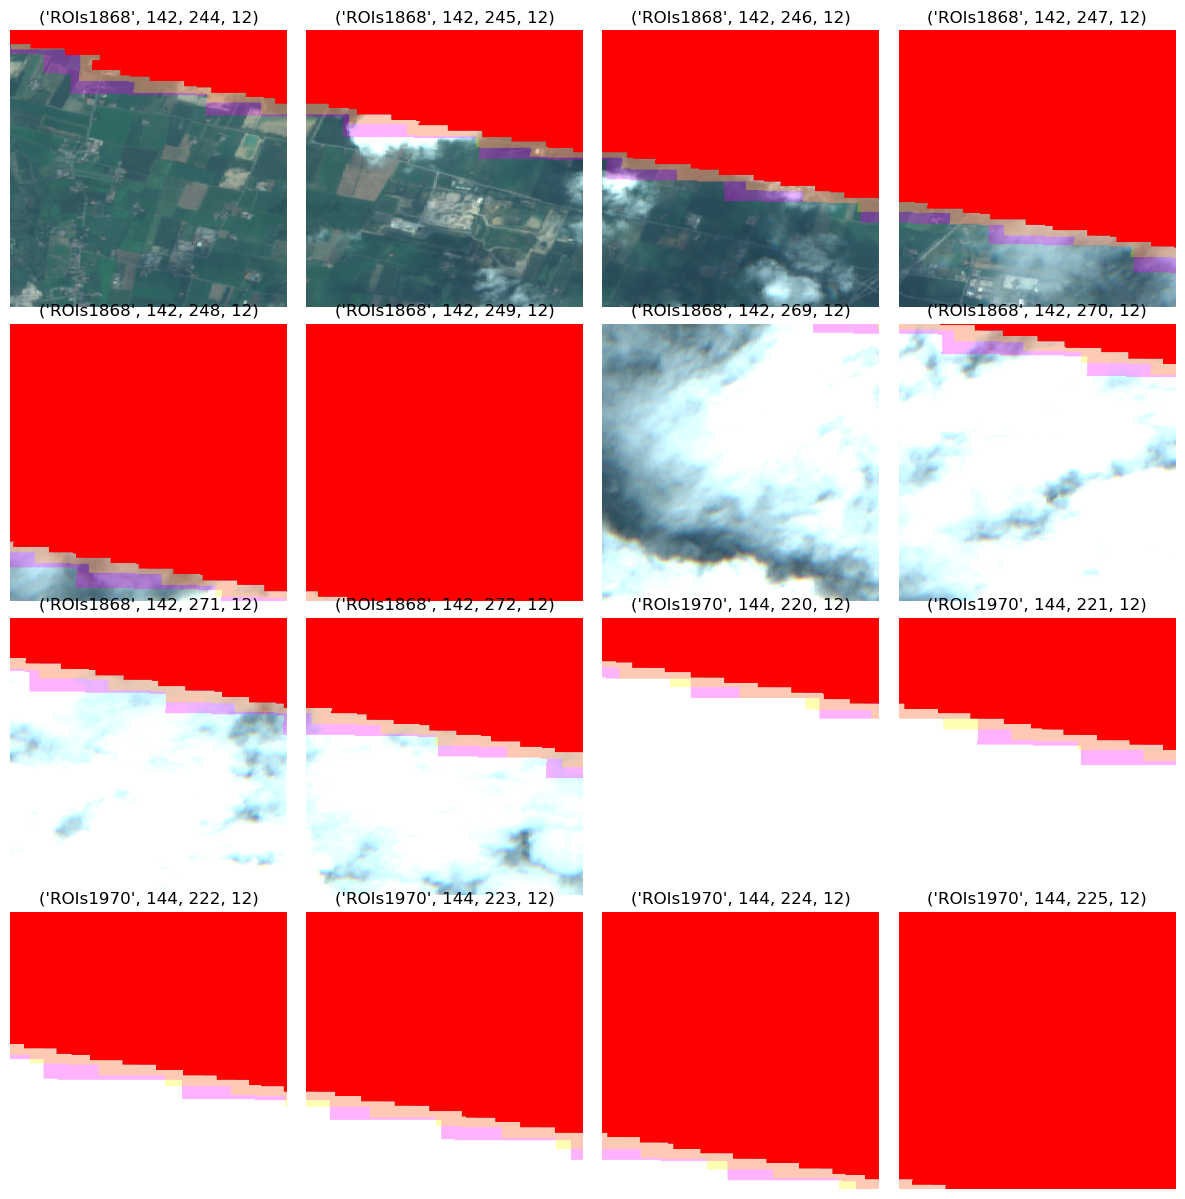

In [35]:
display(fig_1)
# display(batch_num_select_widget, fig_1.canvas)

In [36]:
plt.close(fig_1)

# Find a way to reliably detect swath borders

Even though both swath borders and holes are zero-valued, these cases are not the same and need to be identified and treated differently. That's because holes can be interpolated if they are small enough, whereas swath borders must be masked out in all cases.

Swath borders have the following properties:
- they always touch at least two edges of the patch
- they are always at the edge of the tile (or neignboring a completely empty patch, but we handled that case already)
- all zero pixels of the swath border are connected
- there is only a single swath border area in the patch

**Idea:** find zero-valued areas that touch at least two patch edges. Verify, that there is at most one such area per patch

In [37]:
from skimage.measure import label

In [38]:
labeled_masks = []

for index in tqdm(partially_zero_df.index):
    image = utils.read_tif(dataset_manager.data.loc[index, "S2"])
    zero_mask = (image == 0)
    labeled_masks.append(
        np.asarray([label(band_zero_mask) for band_zero_mask in zero_mask])
    )

  0%|          | 0/432 [00:00<?, ?it/s]

In [39]:
patch_borders = [(0, slice(None)), (-1, slice(None)), (slice(None), 0), (slice(None), -1)]
object_touching_2_borders = np.zeros(partially_zero_df.shape, dtype=np.uint8)

def get_object_touching_2_borders(image):

    if image.ndim == 3:
        return np.asarray([get_object_touching_2_borders(image_band) for image_band in image])

    label_class, n_borders_touched = np.unique(
        np.concatenate(
            [np.unique(image[border]) for border in patch_borders]
        ),
        return_counts=True
    )
    label_class, n_borders_touched = label_class[1:], n_borders_touched[1:]  # remove class zero
    result = label_class[n_borders_touched >=2]
    if result.size == 0:
        return 0
    elif result.size > 1:
        raise ValueError("Something went wrong")
    else:
        return result.item()

for image_n, label_image in enumerate(labeled_masks):
    object_touching_2_borders[image_n] = get_object_touching_2_borders(label_image)

object_touching_2_borders.shape

(432, 13)

In [40]:
detected_patches_with_swath_border = partially_zero_df[object_touching_2_borders.max(axis=1) != 0]
detected_patches_without_swath_border = partially_zero_df[object_touching_2_borders.max(axis=1) == 0]

print(f"Algorithm detected all patches on swath border that we previously identified: "
      f"{patches_definitely_on_swath_border.index.difference(detected_patches_with_swath_border.index).empty}")

Algorithm detected all patches on swath border that we previously identified: True


In [41]:
print(f"Detected swath border: {len(detected_patches_with_swath_border)}")
print(f"NO swath border: {len(detected_patches_without_swath_border)}")

Detected swath border: 86
NO swath border: 346


Find previously undetected patches that could lie on swath border:

In [42]:
possibly_on_swath_border = partially_zero_df.loc[detected_patches_with_swath_border.index.difference(patches_definitely_on_swath_border.index)]
possibly_on_swath_border

B01   B02   B03   B04   B05   B06   B07   B08  \
ROI      tile patch timestep                                                   
ROIs1970 119  0     3          375     0     0     0    97    97    97     0   
                    8            0     0     0     0     0     0     0     0   
                    10        3913  1755  2268  2863  2868  3070  3502  1827   
                    15        2151   847  1236  1466  1716  1796  1937   910   
                    18           0     0     0     0     0     0     0     0   
                    23           0     0     0     0     0     0     0     0   
         139  0     0            1     1     1     1     1     1     1     1   
                    1            1     1     1     1     1     1     1     1   
                    2            1     1     1     1     1     1     1     1   
                    3            1     1     1     1     1     1     1     1   
                    4            1     1     1     1     1     1     1     1   
                    5            1     1     1     1     1     1     1     1   
                    6            1     1     1     1     1     1     1     1   
                    7            1     1     1     1     1     1     1     1   
                    8            1     1     1     1     1     1     1     1   
                    9            1     1     1     1     1     1     1     1   
                    10           1     1     1     1     1     1     1     1   
                    11           1     1     1     1     1     1     1     1   
                    12           1     1     1     1     1     1     1     1   
                    13           1     1     1     1     1     1     1     1   
                    14           1     1     1     1     1     1     1     1   
                    15           1     1     1     1     1     1     1     1   
                    16           1     1     1     1     1     1     1     1   
                    17           1     1     1     1     1     1     1     1   
                    18           1     1     1     1     1     1     1     1   
                    19           1     1     1     1     1     1     1     1   
                    20           1     1     1     1     1     1     1     1   
                    21           1     1     1     1     1     1     1     1   
                    22           1     1     1     1     1     1     1     1   
                    23           1     1     1     1     1     1     1     1   
                    24           1     1     1     1     1     1     1     1   
                    25           1     1     1     1     1     1     1     1   
                    26           1     1     1     1     1     1     1     1   
                    27           1     1     1     1     1     1     1     1   
                    28           1     1     1     1     1     1     1     1   
                    29           1     1     1     1     1     1     1     1   

                               B8A   B09   B10   B11   B12  
ROI      tile patch timestep                                
ROIs1970 119  0     3          148   375  3818  3598  4075  
                    8            0    57   840   802   981  
                    10        3766  3913  3863  4290  5227  
                    15        2077  2457  2089  2882  3092  
                    18           0     0   840   734   981  
                    23           0     0   148    57    97  
         139  0     0            1     1     1     1     1  
                    1            1     1     1     1     1  
                    2            1     1     1     1     1  
                    3            1     1     1     1     1  
                    4            1     1     1     1     1  
                    5            1     1     1     1     1  
                    6            1     1     1     1     1  
                    7            1     1     1     1     1  
              

We can see that some patches only have a single zero pixel somewhere on the edge of the image.

We can filter them out using a simple threshold of 6x6=36 pixels (a single pixel of 60m band)

### Identify remaining patches that lie on swath border

In [43]:
additional_detected_patches_with_swath_border = possibly_on_swath_border.loc[possibly_on_swath_border.max(axis=1) > 36]
additional_detected_patches_without_swath_border = possibly_on_swath_border.loc[possibly_on_swath_border.max(axis=1) <= 36]

additional_detected_patches_with_swath_border

B01   B02   B03   B04   B05   B06   B07   B08  \
ROI      tile patch timestep                                                   
ROIs1970 119  0     3          375     0     0     0    97    97    97     0   
                    8            0     0     0     0     0     0     0     0   
                    10        3913  1755  2268  2863  2868  3070  3502  1827   
                    15        2151   847  1236  1466  1716  1796  1937   910   
                    18           0     0     0     0     0     0     0     0   
                    23           0     0     0     0     0     0     0     0   

                               B8A   B09   B10   B11   B12  
ROI      tile patch timestep                                
ROIs1970 119  0     3          148   375  3818  3598  4075  
                    8            0    57   840   802   981  
                    10        3766  3913  3863  4290  5227  
                    15        2077  2457  2089  2882  3092  
                    18           0     0   840   734   981  
                    23           0     0   148    57    97

In [44]:
print(f"Additionally detected with border: {len(additional_detected_patches_with_swath_border)}")
print(f"Additionally detected NO border: {len(additional_detected_patches_without_swath_border)}")

Additionally detected with border: 6
Additionally detected NO border: 30


In [45]:
patches_with_swath_border = pd.concat([patches_definitely_on_swath_border, additional_detected_patches_with_swath_border])
patches_with_swath_border = patches_with_swath_border.sort_index()
print(f"Patches with swath border: {len(patches_with_swath_border)}")

Patches with swath border: 56


In [46]:
zero_patches_without_swath_border = pd.concat([detected_patches_without_swath_border, additional_detected_patches_without_swath_border])
zero_patches_without_swath_border = zero_patches_without_swath_border.sort_index()
print(f"Zero patches without swath border: {len(zero_patches_without_swath_border)}")

Zero patches without swath border: 376


# Inspect patches visually

In [47]:
df_to_investigate = additional_detected_patches_without_swath_border

In [48]:
with plt.ioff():
    fig_2, axs_2 = plt.subplots(nrows=4, ncols=4, figsize=(12, 12), tight_layout=True)

In [49]:
empty_image = np.ones((13, 256, 256)) * 0.75
n_batches_2 = np.ceil(df_to_investigate.shape[0] / 16).astype(int)

def update_image_2(batch_num):

    fig_2.suptitle(f"Batch: {batch_num} / {n_batches_2-1}")

    batch = df_to_investigate.iloc[16*batch_num:16*(batch_num+1)]
    S2_image_paths = dataset_manager.data.loc[batch.index, "S2"]
    S2_images = [(index, utils.read_tif(image_path)) for index, image_path in S2_image_paths.items()]
    S2_images_rescaled = [(index, utils.rescale_s2(image)) for index, image in S2_images]
    S2_images_rescaled = S2_images_rescaled + [("", empty_image)] * (16 - len(S2_images))  # if less then 16 images, append some empty images

    S2_masks = {
        resolution: [~(image[batch.columns.get_indexer(resolutions[resolution])] != 0).prod(axis=0, dtype=bool) for _, image in S2_images]
        for resolution in resolutions
    }
    
    for image_num, (ax, (index, image)) in enumerate(zip(axs_2.flatten(), S2_images_rescaled)):

        ax.clear()
        
        ax.imshow(
            np.clip(
                utils.bands_last(image[[3, 2, 1]]),
                a_min=0.0, 
                a_max=1.0
            )
        )

        title_upper = f"|"
        title_lower = f"|"
        
        for resolution in reversed(resolutions):
            try:
                ax.imshow(
                    S2_masks[resolution][image_num].astype(float),
                    cmap=mpl.colors.ListedColormap([colors[resolution]]),
                    alpha=S2_masks[resolution][image_num].astype(float) * transparencies[resolution]
                )
                title_upper = title_upper + f"{resolution:^5}|"
                title_lower = title_lower + f"{S2_masks[resolution][image_num].sum():^7}|"
            except IndexError:
                pass
        ax.set_axis_off()
        ax.set_title(title_upper + "\n" + title_lower)

batch_num_select_2 = widgets.BoundedIntText(
    value=0,
    min=0,
    max=n_batches_2-1,
    step=1,
    description='Batch:',
    disabled=False
)

batch_num_select_widget_2 = interactive(update_image_2, batch_num=batch_num_select_2)

interactive(children=(BoundedIntText(value=0, description='Batch:', max=1), Output()), _dom_classes=('widget-i…

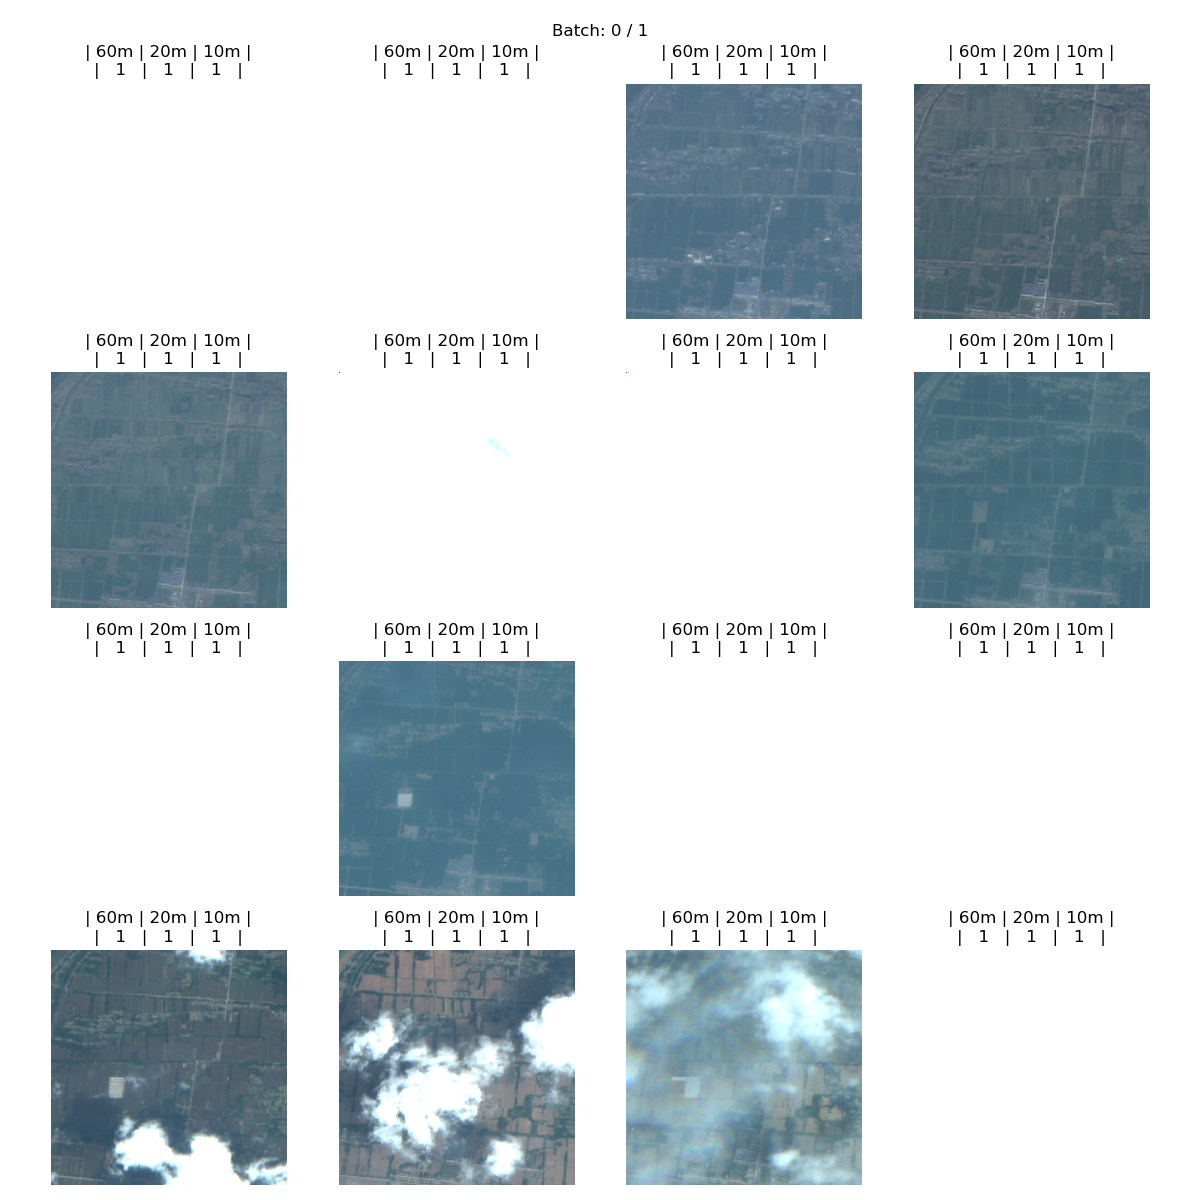

In [50]:
# display(fig_2)
display(batch_num_select_widget_2, fig_2.canvas)

In [51]:
plt.close(fig_2)

# Visualize distribution of zero pixels in 10m bands

In [52]:
partially_zero_10m = zero_patches_without_swath_border[resolutions["10m"]].max(axis=1)

not_zero_10m = partially_zero_10m.loc[partially_zero_10m == 0]
partially_zero_10m = partially_zero_10m.loc[partially_zero_10m != 0]

partially_zero_10m

ROI       tile  patch  timestep
ROIs1868  121   61     26          2
                104    3           2
                111    26          1
                127    3           3
                       25          2
                                  ..
ROIs1970  139   0      25          1
                       26          1
                       27          1
                       28          1
                       29          1
Length: 70, dtype: int64

In [53]:
log_bins = np.append(np.array([0]), (2 ** np.arange(17)))
log_bins

array([    0,     1,     2,     4,     8,    16,    32,    64,   128,
         256,   512,  1024,  2048,  4096,  8192, 16384, 32768, 65536])

Threshold: 128


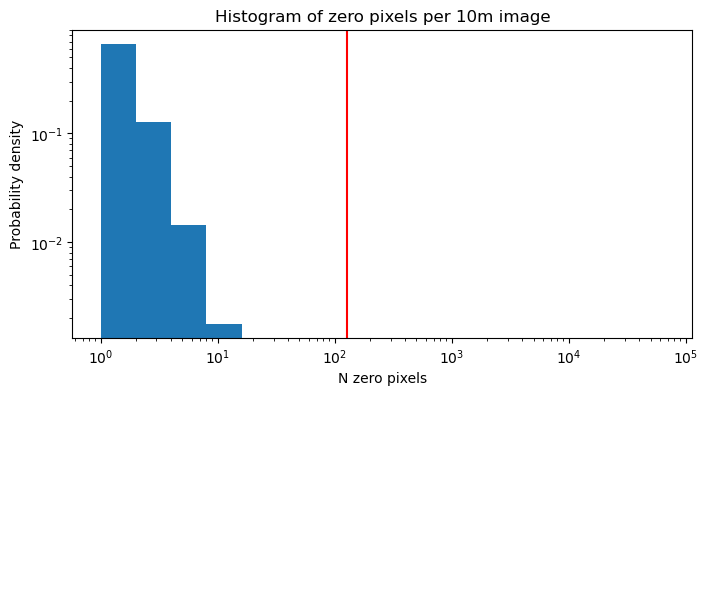

In [54]:
with plt.ioff():
    fig_3, ax_3 = plt.subplots(figsize=(8, 4))
    
threshold_index = 8
n_zero_pixels_threshold = log_bins[threshold_index]
print(f"Threshold: {n_zero_pixels_threshold}")

hist_3, bins_3, _ = ax_3.hist(partially_zero_10m, bins=log_bins, density=True, log=True)
ax_3.set_xscale('log')
ax_3.set_ylabel('Probability density')
ax_3.set_xlabel('N zero pixels')
ax_3.set_title("Histogram of zero pixels per 10m image")
ax_3.axvline(x=n_zero_pixels_threshold, color="red")

hist_3_count, _ = np.histogram(partially_zero_10m, bins=log_bins)
n_images_with_few_zeros = hist_3_count[:threshold_index-1].sum()
n_images_with_many_zeros = hist_3_count[threshold_index-1:].sum()

ax_3.text(x=(10**0.2), y=(10**-5.3), s=f"N images: {n_images_with_few_zeros}", color="white")
ax_3.text(x=(10**2.6), y=(10**-5.3), s=f"N images: {n_images_with_many_zeros}", color="white")

display(fig_3)

In [55]:
plt.close(fig_3)

It is safe to assume that if number of pixels is small, then they can be dealt with by interpolation. Otherwise the number is too high.

We empirically set n_zero_pixels = 128 to be the threshold between these two classes

# Save results

In [56]:
patches_with_zeros = pd.DataFrame(
    False,
    index=some_zero_pixels_df.index,
    columns=["Empty", "Border"]
)

patches_with_zeros

Empty  Border
ROI      tile patch timestep               
ROIs1868 17   51    26        False   False
              278   26        False   False
              294   26        False   False
              302   26        False   False
              326   26        False   False
...                             ...     ...
ROIs2017 115  284   29        False   False
         117  31    4         False   False
         130  87    27        False   False
         146  102   21        False   False
              266   3         False   False

[2358 rows x 2 columns]

In [57]:
patches_with_zeros["Empty"].loc[fully_zero_df.index] = True
patches_with_zeros["Border"].loc[patches_with_swath_border.index] = True
patches_with_zeros = patches_with_zeros.sort_index()

patches_with_zeros

Empty  Border
ROI      tile patch timestep               
ROIs1868 17   51    26        False   False
              278   26        False   False
              294   26        False   False
              302   26        False   False
              326   26        False   False
...                             ...     ...
ROIs2017 115  284   29         True   False
         117  31    4         False   False
         130  87    27        False   False
         146  102   21        False   False
              266   3         False   False

[2358 rows x 2 columns]

In [58]:
print(f"Empty patches: {patches_with_zeros['Empty'].sum()}")
print(f"Patches on swath border: {patches_with_zeros['Border'].sum()}")
print(f"Patches that can be interpolates: {(~patches_with_zeros['Empty'] & ~patches_with_zeros['Border']).sum()}")

Empty patches: 1926
Patches on swath border: 56
Patches that can be interpolates: 376


In [59]:
patches_with_zeros.to_csv(join(dataset_manager.project_directory, "stats", "S2_patches_with_zeros.csv"))

# Interpolate patches and modify Dataset Manager

In [60]:
from spatiotemporal.mods import ZeroPixelsS2

In [61]:
ZeroPixelsS2(dataset_manager).apply(verbose=True)

In [66]:
dataset_manager.data[dataset_manager.data.isna().any(axis=1)]

S1  \
ROI      tile patch timestep                                                      
ROIs1868 139  0     13        /LOCAL2/shvl/datasets/cloud_removal/SEN12MSCRT...   
              1     13        /LOCAL2/shvl/datasets/cloud_removal/SEN12MSCRT...   
              2     13        /LOCAL2/shvl/datasets/cloud_removal/SEN12MSCRT...   
              3     13        /LOCAL2/shvl/datasets/cloud_removal/SEN12MSCRT...   
              4     13        /LOCAL2/shvl/datasets/cloud_removal/SEN12MSCRT...   
...                                                                         ...   
ROIs2017 115  280   29        /LOCAL2/shvl/datasets/cloud_removal/SEN12MSCRT...   
              281   29        /LOCAL2/shvl/datasets/cloud_removal/SEN12MSCRT...   
              282   29        /LOCAL2/shvl/datasets/cloud_removal/SEN12MSCRT...   
              283   29        /LOCAL2/shvl/datasets/cloud_removal/SEN12MSCRT...   
              284   29        /LOCAL2/shvl/datasets/cloud_removal/SEN12MSCRT...   

                               S2 S2CLOUDMAP  
ROI      tile patch timestep                  
ROIs1868 139  0     13        NaN        NaN  
              1     13        NaN        NaN  
              2     13        NaN        NaN  
              3     13        NaN        NaN  
              4     13        NaN        NaN  
...                           ...        ...  
ROIs2017 115  280   29        NaN        NaN  
              281   29        NaN        NaN  
              282   29        NaN        NaN  
              283   29        NaN        NaN  
              284   29        NaN        NaN  

[1982 rows x 3 columns]